In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [15]:
file_loc = r'C:\Users\nkuma\Downloads\EE 798Q\Open pit blasting.csv'
air_pollution_data = pd.read_csv(file_loc, index_col=0,  header = 0)

In [16]:
air_pollution_data.head()

,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [17]:
data = pd.DataFrame(air_pollution_data)

In [18]:
data.columns = ['From','To','PM10(µg/m3)','PM2.5(µg/m3)','NO(µg/m3)','NO2(µg/m3)','NOX(ppb)','CO(mg/m3)','SO2(µg/m3)','NH3(µg/m3)','Ozone(µg/m3)','Benzene(µg/m3)']

In [19]:
data.head(1)

,From,To,PM10(µg/m3),PM2.5(µg/m3),NO(µg/m3),NO2(µg/m3),NOX(ppb),CO(mg/m3),SO2(µg/m3),NH3(µg/m3),Ozone(µg/m3),Benzene(µg/m3)
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4


In [20]:
# data['Time Interval'] = data['From']+' - '+data['To']
data.fillna(value = 0, inplace = True)
data.head(1)

,From,To,PM10(µg/m3),PM2.5(µg/m3),NO(µg/m3),NO2(µg/m3),NOX(ppb),CO(mg/m3),SO2(µg/m3),NH3(µg/m3),Ozone(µg/m3),Benzene(µg/m3)
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,0.0,90.1,56.2,0.31,0.0,17.7,28.1,0.4


In [21]:
data = data[:-3]
data
#FROM = data['From']
#TO = data['To']
#data['Total Pollution'] = PM10+PM25+NO+NO2+CO+SO2+NH3+OZONE+BENZENE+(NOX*44.013)/24.45
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   From            8640 non-null   object 
 1   To              8640 non-null   object 
 2   PM10(µg/m3)     8640 non-null   float64
 3   PM2.5(µg/m3)    8640 non-null   float64
 4   NO(µg/m3)       8640 non-null   float64
 5   NO2(µg/m3)      8640 non-null   float64
 6   NOX(ppb)        8640 non-null   float64
 7   CO(mg/m3)       8640 non-null   float64
 8   SO2(µg/m3)      8640 non-null   float64
 9   NH3(µg/m3)      8640 non-null   float64
 10  Ozone(µg/m3)    8640 non-null   float64
 11  Benzene(µg/m3)  8640 non-null   float64
dtypes: float64(10), object(2)
memory usage: 877.5+ KB


In [22]:
data['To'] = pd.to_datetime(data['To'],format='%Y-%m-%d %H:%M:%S')
data['From'] = pd.to_datetime(data['From'], format = '%Y-%m-%d %H:%M:%S')
t = data['To'][8040]
t

Timestamp('2023-04-25 18:00:00')

In [23]:
data.drop(['From'], axis = 1, inplace = True)

Plotting whole time series with replacing null values with zero

<IPython.core.display.Javascript object>


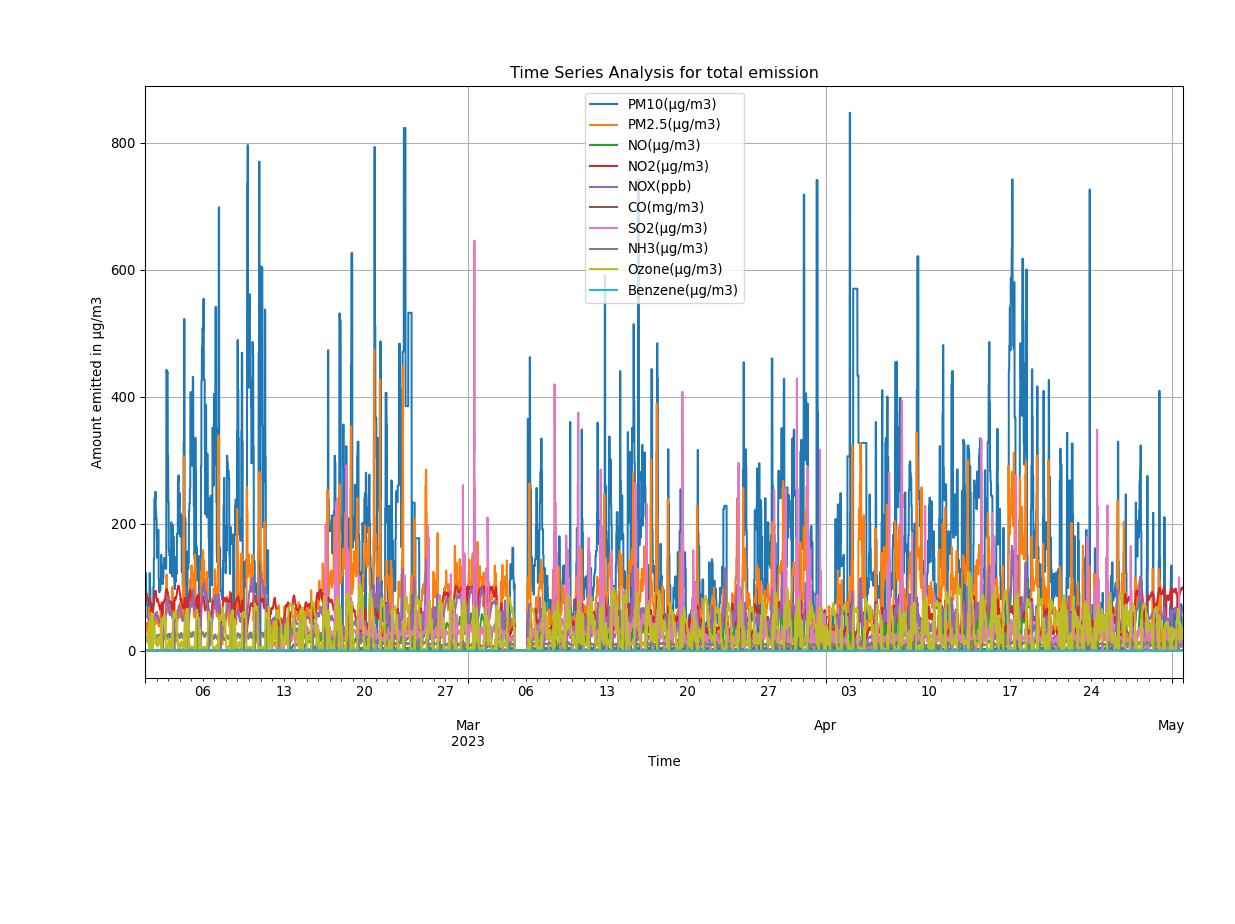

In [12]:
%matplotlib notebook

data.set_index(['To'], inplace=True)
data.plot()
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Time Series Analysis for total emission')
plt.tight_layout()
plt.grid()
plt.legend()

In [13]:
PM10 = data['PM10(µg/m3)']
PM25 = data['PM2.5(µg/m3)']
NO = data['NO(µg/m3)']
NO2 = data['NO2(µg/m3)']
NOX = data['NOX(ppb)']
CO = data['CO(mg/m3)']
SO2 = data['SO2(µg/m3)']
NH3 = data['NH3(µg/m3)']
OZONE = data['Ozone(µg/m3)']
BENZENE = data['Benzene(µg/m3)']

In [72]:
mask = (data.index <= t)
training_data = data[mask].copy()
testing_data = data[~mask].copy()

<IPython.core.display.Javascript object>


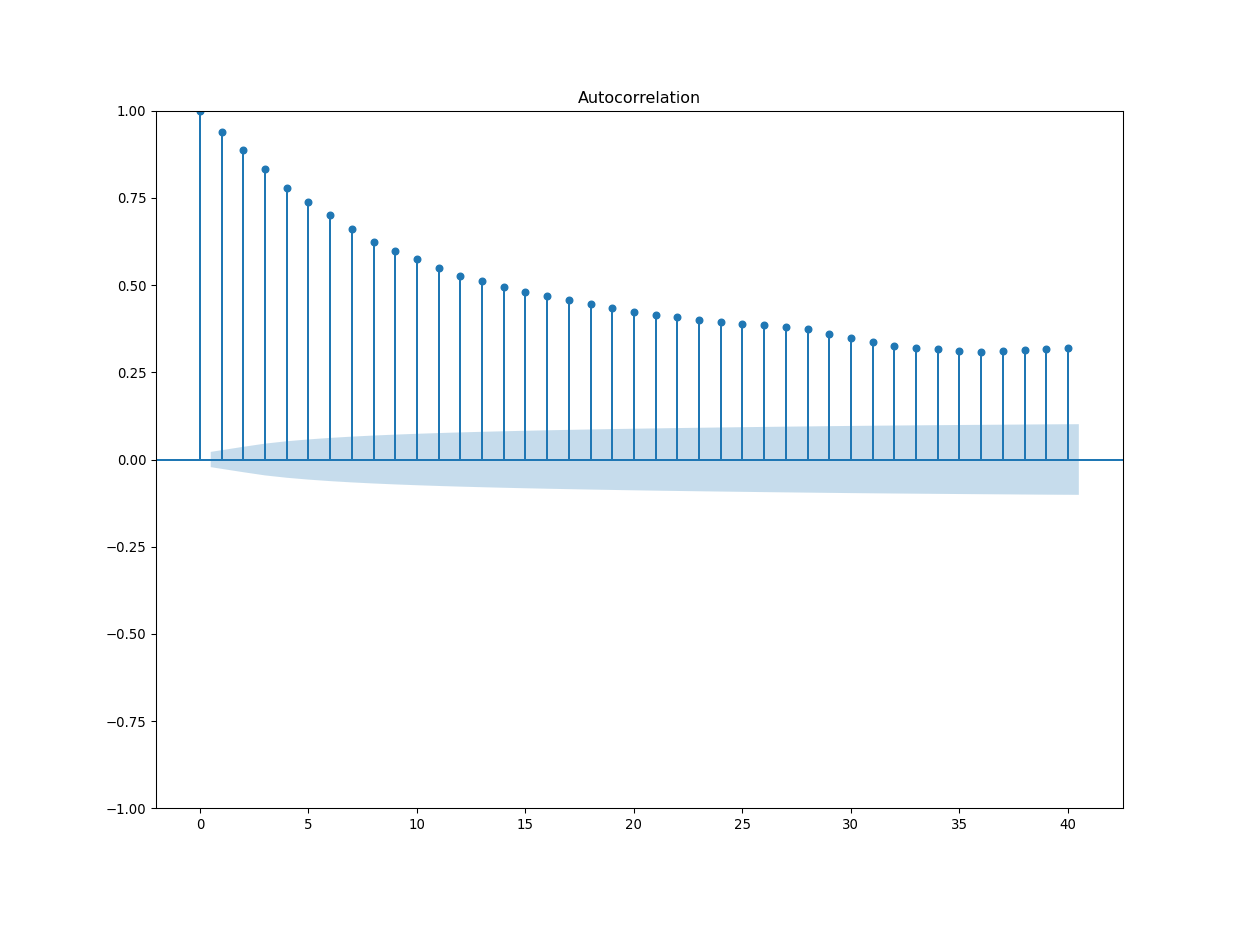

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<IPython.core.display.Javascript object>


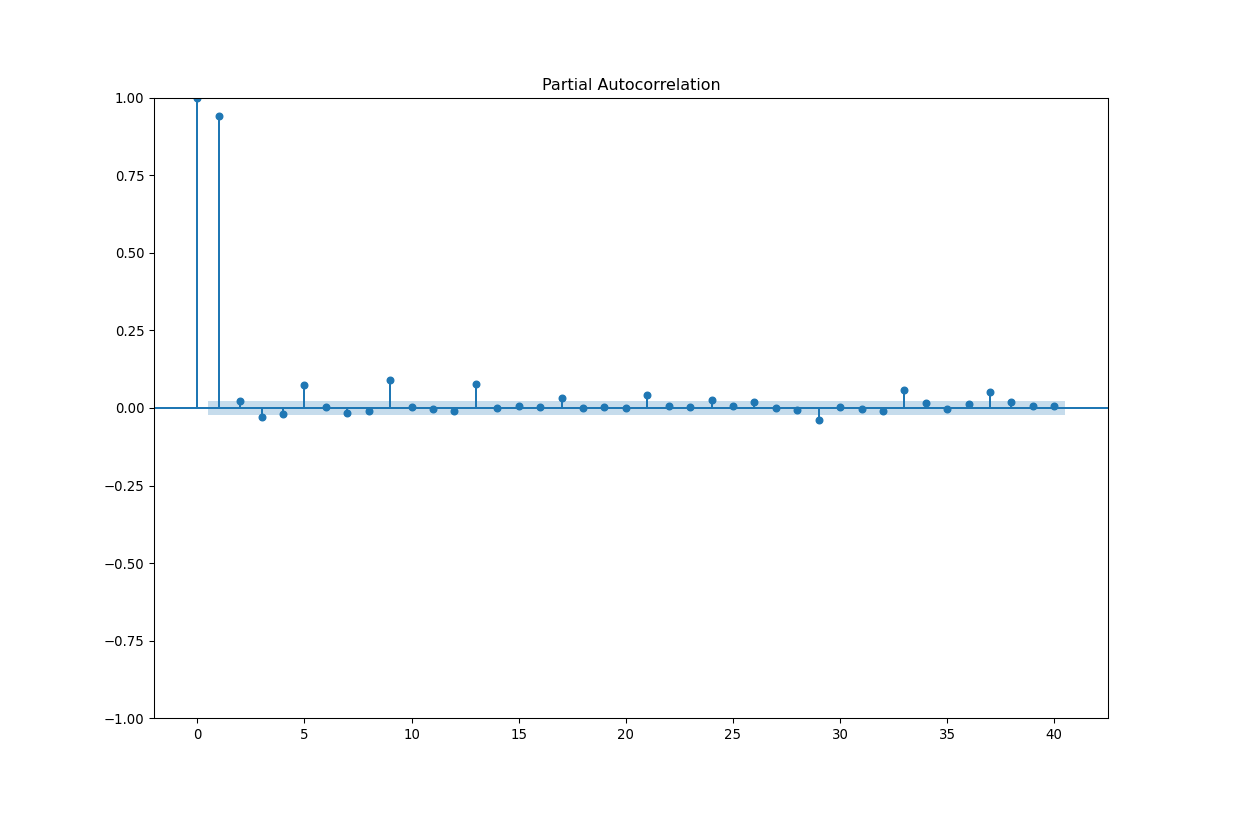

In [73]:
acf_plot = plot_acf(training_data['PM10(µg/m3)'])
pacf_plot = plot_pacf(training_data['PM10(µg/m3)'])

In [74]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(training_data['PM10(µg/m3)'])
print(f'p-value : {adf_test[1]}')

p-value : 5.9788743972155885e-12


In [75]:
# we set d = 0

In [76]:
#conda install pmdarima

In [77]:
from pmdarima.arima import auto_arima

def arimamodel(timeseriesarray) :
    autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, max_p=5, max_q=2, d=0, test="adf", trace = True)
    return autoarima_model

In [78]:
arima_model = arimamodel(training_data['PM10(µg/m3)'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102751.312, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85472.951, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=95173.664, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108711.435, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=85470.774, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=85466.687, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=85465.995, Time=0.63 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=85424.209, Time=0.64 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=85426.253, Time=3.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=85425.260, Time=6.94 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=85532.897, Time=0.36 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 14.702 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8040
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -42705.104
Date:                Fri, 23 Jun 2023   AIC                          85424.209
Time:                        23:37:14   BIC                          85473.154
Sample:                    02-01-2023   HQIC                         85440.958
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.5986      1.343      6.405      0.000       5.967      11.230
ar.L1          0.9200      0.008    111.429      0.000       0.904       0.936
ar.L2          0.0497      0.036      1.367      0.172      -0.022       0.121
ar.L3         -0.0143      0.039     -0.367      0.714      -0.091       0.062
ar.L4         -0.0860      0.016     -5.486      0.000      -0.117      -0.055
ar.L5          0.0736      0.004     18.918      0.000       0.066       0.081
sigma2      2405.6713     11.225    214.317      0.000    2383.671    2427.672
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1051026.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\Users\nkuma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


<IPython.core.display.Javascript object>


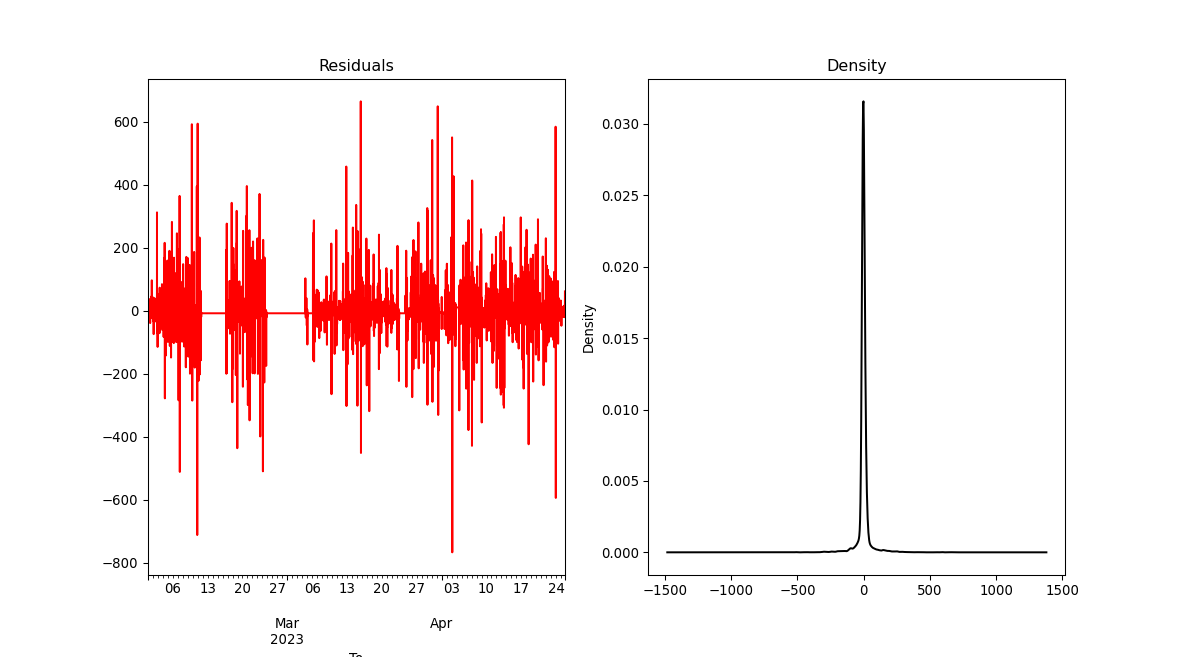

In [24]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(training_data['PM10(µg/m3)'], order=(5, 0, 0))  # Replace p, d, q with appropriate values
arima_model_fit = arima_model.fit()

# Access the residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals' , ax = ax[0] ,color = 'r')
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1], color = 'black')
plt.show()

As seen above residue is white noise with mean zero and constant variance

In [79]:
test_auto = arima_model.predict(n_periods = len(testing_data['PM10(µg/m3)']))
data['PM10 forecast'] = [None]*len(training_data['PM10(µg/m3)']) + list(test_auto)

<IPython.core.display.Javascript object>


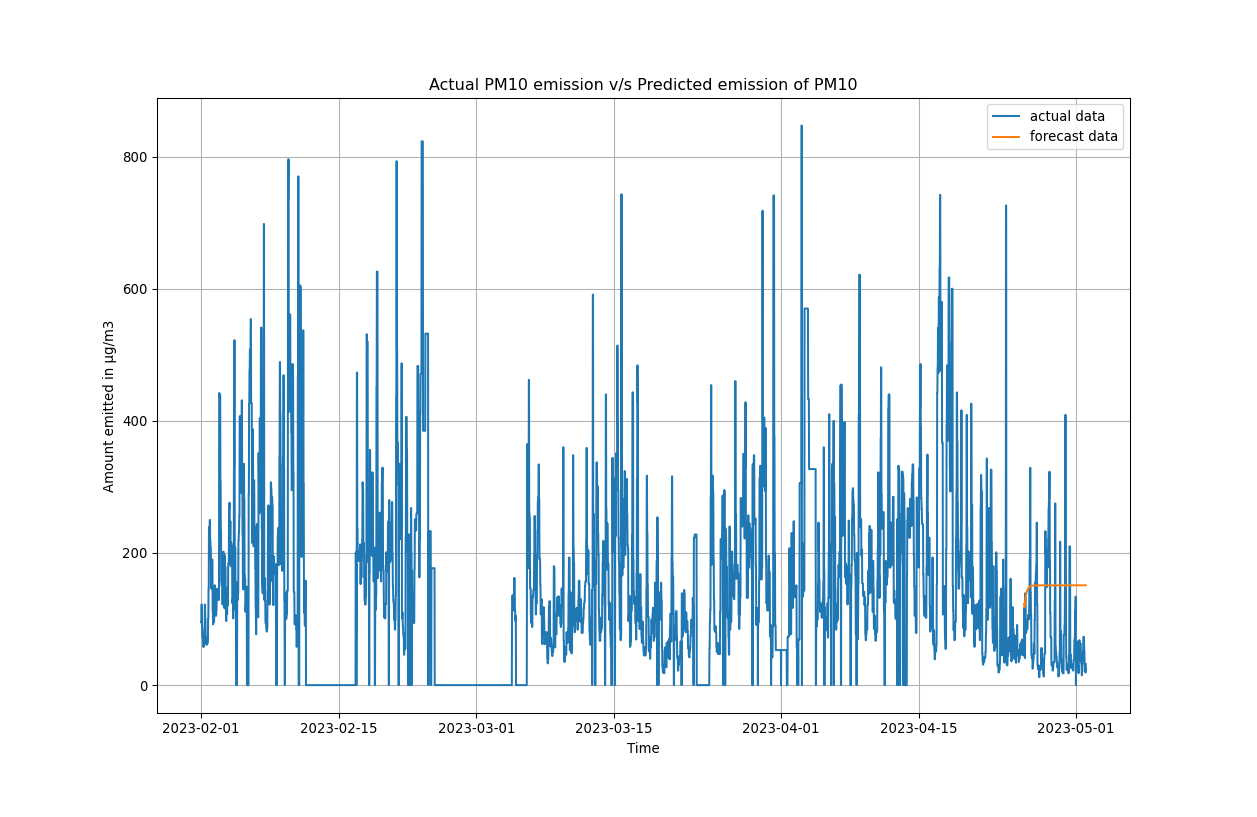

In [80]:
%matplotlib notebook
# #data.set_index(['To'], inplace = True)
plt.plot(PM10, label='actual data')
plt.plot(data['PM10 forecast'], label='forecast data')
plt.xlabel('Time')
plt.ylabel('Amount emitted in µg/m3')
plt.title('Actual PM10 emission v/s Predicted emission of PM10')
plt.grid()
plt.legend()
plt.show()


In [81]:
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                        K.epsilon(),
                                        None))
    return 100. * K.mean(diff, axis=-1)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(testing_data['PM10(µg/m3)'], test_auto)
mape = mean_absolute_percentage_error(testing_data['PM10(µg/m3)'], test_auto)
rmse = np.sqrt(mean_squared_error(testing_data['PM10(µg/m3)'], test_auto))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 94.42947738090736
mape : 1133980210195813.0
rmse : 103.12108010618226


Since we filled all the NaN values with zero so the mean absolute percentage error is very high so we will not replace NaN values with zero instead we will replace them with the mean of that column as it will maintain stationarity and not disturb the distribution much